In [ ]:
!pip install torch torchvision torchaudio
!pip install wandb pandas numpy scikit-learn tensorflow matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!wandb login


wandb: Currently logged in as: shubhamnijhawan03 (shubhamnijhawan03-vellore-institute-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import wandb


In [ ]:
from wandb.keras import WandbCallback


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer



In [ ]:
wandb.init(project="Titanic-Survival-Prediction")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [ ]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


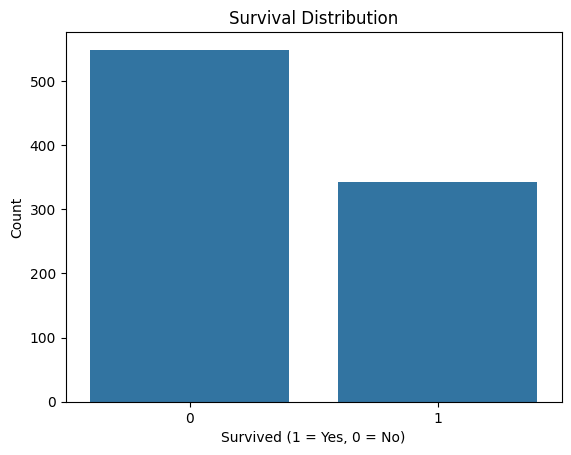

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Survived vs Not Survived
sns.countplot(x=train_data["Survived"])
plt.title("Survival Distribution")
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


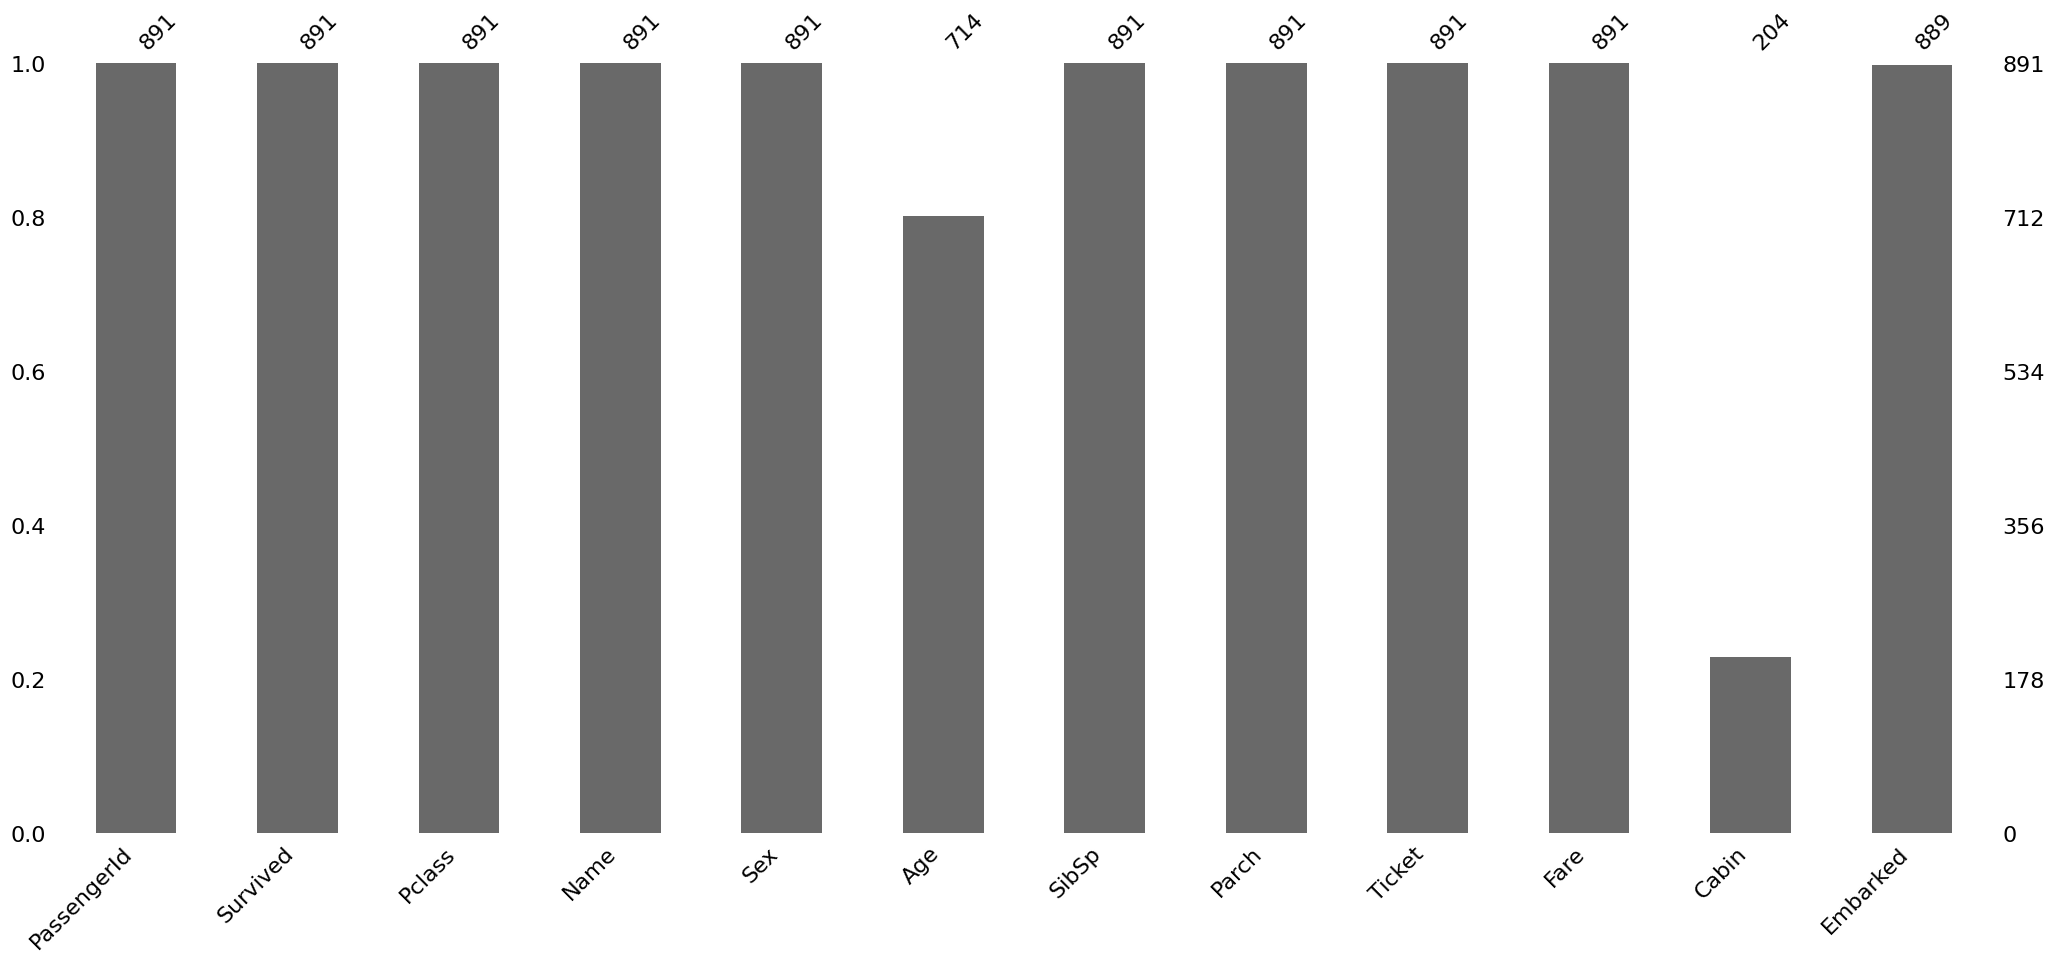

In [ ]:
import missingno as msno

# Visualize missing values
msno.bar(train_data)
plt.show()


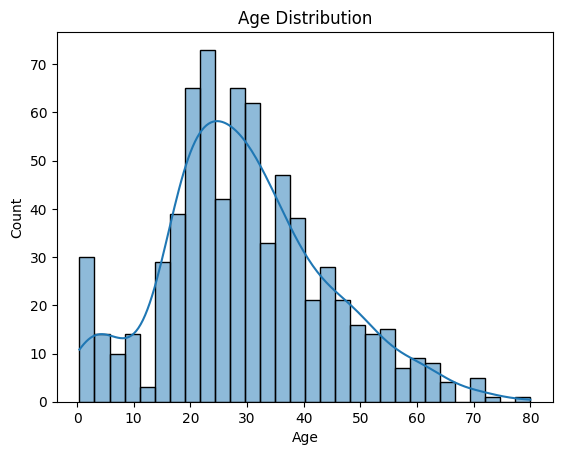

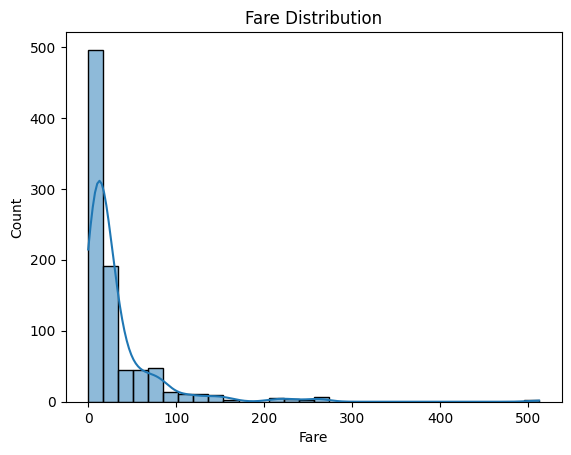

In [ ]:
# Distribution of Age
sns.histplot(train_data["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.histplot(train_data["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()


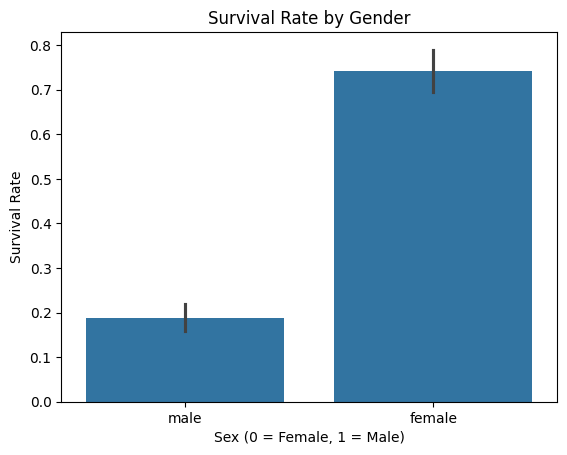

In [ ]:
# Survival rate by Sex
sns.barplot(x="Sex", y="Survived", data=train_data)
plt.title("Survival Rate by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Survival Rate")
plt.show()


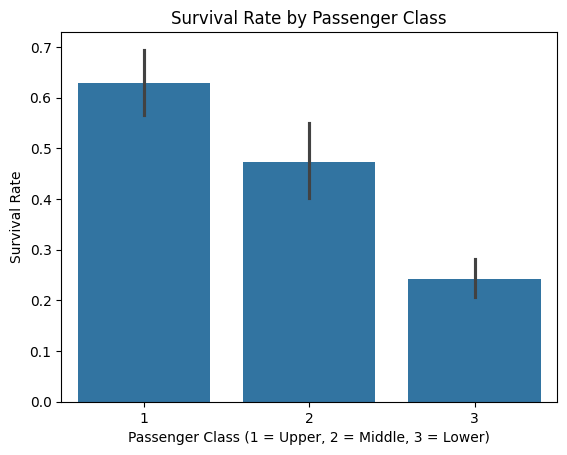

In [ ]:
sns.barplot(x="Pclass", y="Survived", data=train_data)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)")
plt.ylabel("Survival Rate")
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer

# Fill missing Age values with the mean
age_imputer = SimpleImputer(strategy="mean")
train_data["Age"] = age_imputer.fit_transform(train_data[["Age"]])

# Fill missing Embarked values with the most common value (mode)
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

# Drop the Cabin column since it has too many missing values
train_data.drop(columns=["Cabin"], inplace=True)

# Verify there are no missing values left
train_data.isnull().sum()


<ipython-input-21-0822a4e6207f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' column (Male = 1, Female = 0)
label_encoder = LabelEncoder()
train_data["Sex"] = label_encoder.fit_transform(train_data["Sex"])

# Encode 'Embarked' column
train_data["Embarked"] = label_encoder.fit_transform(train_data["Embarked"])

# Verify the encoding
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [ ]:
# Select features for training
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_data[features]

# Target variable (Survived)
y = train_data["Survived"]

# Verify the selected features
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
test_data = pd.read_csv("test.csv")


test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Fill missing Age values with the mean
test_data["Age"] = age_imputer.transform(test_data[["Age"]])

# Fill missing Fare values with the mean (since test data might have missing values in Fare)
fare_imputer = SimpleImputer(strategy="mean")
test_data["Fare"] = fare_imputer.fit_transform(test_data[["Fare"]])

# Fill missing Embarked values with mode (if any)
test_data["Embarked"].fillna(test_data["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (since we dropped it from training data)
if "Cabin" in test_data.columns:
    test_data.drop(columns=["Cabin"], inplace=True)

# Verify no missing values
test_data.isnull().sum()


<ipython-input-25-4f2d7e066ac9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Embarked"].fillna(test_data["Embarked"].mode()[0], inplace=True)


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,0


In [ ]:
test_data=pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Drop Cabin column (since we dropped it from training data)
if "Cabin" in test_data.columns:
    test_data.drop(columns=["Cabin"], inplace=True)


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
# Encode 'Sex' column (Male = 1, Female = 0)

test_data["Sex"] = label_encoder.fit_transform(test_data["Sex"])

# Encode 'Embarked' column
test_data["Embarked"] = label_encoder.fit_transform(test_data["Embarked"])

# Verify the encoding
test_data.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,2
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,0
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,2


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train & test data
X_train_scaled = scaler.fit_transform(train_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])
X_test_scaled = scaler.transform(test_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

# Verify shape
print("Scaled Training Data Shape:", X_train_scaled.shape)
print("Scaled Test Data Shape:", X_test_scaled.shape)


Scaled Training Data Shape: (891, 7)
Scaled Test Data Shape: (418, 7)


In [ ]:
import tensorflow as tf

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train_scaled,  # Input features (scaled)
    train_data["Survived"],  # Target variable
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=50,  # Number of training iterations
    batch_size=16,  # Number of samples per gradient update
    verbose=1  # Show training progress
)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4937 - loss: 0.7360 - val_accuracy: 0.6536 - val_loss: 0.6375
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6057 - loss: 0.6359 - val_accuracy: 0.7151 - val_loss: 0.5620
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6782 - loss: 0.5866 - val_accuracy: 0.7989 - val_loss: 0.5169
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7748 - loss: 0.5345 - val_accuracy: 0.8212 - val_loss: 0.4878
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.5245 - val_accuracy: 0.8268 - val_loss: 0.4590
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7988 - loss: 0.4959 - val_accuracy: 0.8268 - val_loss: 0.4354
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.5011 - val_accuracy: 0.8324 - val_loss: 0.4182
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.4833 - val_accuracy: 0.8380 - val_loss:

In [ ]:
# Evaluate the model on the test dataset
test_predictions = model.predict(X_test_scaled)

# Convert probabilities to binary predictions (Survived: 1, Not Survived: 0)
test_predictions = (test_predictions > 0.5).astype(int)

# Print the first 10 predictions
print("First 10 Predictions:", test_predictions[:10].flatten())


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
First 10 Predictions: [0 0 0 0 1 0 1 0 1 0]


In [ ]:
# Create a submission dataframe
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],  # Keep PassengerId from test dataset
    "Survived": test_predictions.flatten()  # Use model predictions
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

# Display the first few rows
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# Evaluate the model on the training dataset
train_loss, train_acc = model.evaluate(X_train_scaled, train_data["Survived"], verbose=0)

# Print accuracy
print(f"Training Accuracy: {train_acc:.4f}")


Training Accuracy: 0.8350


In [ ]:
from google.colab import files
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Modify WandbCallback to log accuracy, loss, and learning rate correctly
class CustomWandbCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs["learning_rate"] = self.model.optimizer.learning_rate.numpy()  # Fix for learning rate logging
        wandb.log(logs)  # Log metrics to Weights & Biases

In [ ]:
wandb.init(project="Titanic-Survival-Prediction", name="Experiment_with_LR", config={
    "epochs": 50,
    "batch_size": 16,
    "optimizer": "Adam"
})

# Train the model
history = model.fit(
    X_train_scaled, y,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1,
    callbacks=[CustomWandbCallback()]  # Custom callback for logging
)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8221 - loss: 0.4249 - val_accuracy: 0.8547 - val_loss: 0.3446 - learning_rate: 0.0010
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8504 - loss: 0.3789 - val_accuracy: 0.8547 - val_loss: 0.3423 - learning_rate: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8259 - loss: 0.4174 - val_accuracy: 0.8603 - val_loss: 0.3413 - learning_rate: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8125 - loss: 0.4411 - val_accuracy: 0.8659 - val_loss: 0.3397 - learning_rate: 0.0010
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8345 - loss: 0.4007 - val_accuracy: 0.8547 - val_loss: 0.3425 - learning_rate: 0.0010
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8340 - loss: 0.3878 - val_accuracy: 0.8659 - val_loss: 0.3386 - learning_rate: 0.0010
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8414 - loss: 0.3794 - val_accurac

In [ ]:
# Function to train model with different hyperparameters
def train_experiment(learning_rate, optimizer_name):
    wandb.init(project="Titanic-Survival-Prediction", name=f"LR_{learning_rate}_OPT_{optimizer_name}", config={
        "learning_rate": learning_rate,
        "optimizer": optimizer_name,
        "epochs": 50,
        "batch_size": 16
    })

    # Choose optimizer based on input
    if optimizer_name == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    # Define the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define Custom Callback for W&B Logging
    class CustomWandbCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            logs = logs or {}
            logs["learning_rate"] = self.model.optimizer.learning_rate.numpy()
            wandb.log(logs)

    # Train the model
    history = model.fit(
        X_train_scaled, y,
        validation_split=0.2,
        epochs=50,
        batch_size=16,
        verbose=1,
        callbacks=[CustomWandbCallback()]
    )

    # Save the model checkpoint
    model.save(f"model_LR_{learning_rate}_OPT_{optimizer_name}.h5")
    wandb.save(f"model_LR_{learning_rate}_OPT_{optimizer_name}.h5")

    # Finish logging
    wandb.finish()

    return history

In [ ]:
# Define hyperparameter values
learning_rates = [0.001, 0.0005, 0.0001]
optimizers = ["adam", "sgd"]

# Run experiments
for lr in learning_rates:
    for opt in optimizers:
        print(f"\n🔹 Running Experiment: Learning Rate = {lr}, Optimizer = {opt}")
        train_experiment(learning_rate=lr, optimizer_name=opt)



🔹 Running Experiment: Learning Rate = 0.001, Optimizer = adam
Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5892 - loss: 0.6829 - val_accuracy: 0.7151 - val_loss: 0.6673 - learning_rate: 0.0010
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7012 - loss: 0.6633 - val_accuracy: 0.7542 - val_loss: 0.6275 - learning_rate: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7486 - loss: 0.6176 - val_accuracy: 0.7821 - val_loss: 0.5821 - learning_rate: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7954 - loss: 0.5689 - val_accuracy: 0.7821 - val_loss: 0.5324 - learning_rate: 0.0010
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7976 - loss: 0.5330 - val_accuracy: 0.7989 - val_loss: 0.4897 - learning_rate: 0.0010
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7786 - loss: 0.5245 - val_accuracy: 0.8156 - val_loss: 0.4541 - learning_rate: 0.0010
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━

accuracy,▇▆▆▆▆▆▆▆▇▇▇▇█▇▇▇▇▇█▇▁▁▂▂▃▃▅▄▄▄▅▅▅▅▆▆▅▆▆▆
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▇▅▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▆▆▇▆▆▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇██████▇█▁▅▅▆▅▅▆▆▆▆█
val_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▇▅▄▄▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,0.83146
learning_rate,0.001
loss,0.39939
val_accuracy,0.87151
val_loss,0.3374



🔹 Running Experiment: Learning Rate = 0.001, Optimizer = sgd


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6667 - loss: 0.6798 - val_accuracy: 0.6872 - val_loss: 0.6760 - learning_rate: 0.0010
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6460 - loss: 0.6766 - val_accuracy: 0.6872 - val_loss: 0.6748 - learning_rate: 0.0010
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6253 - loss: 0.6798 - val_accuracy: 0.6927 - val_loss: 0.6736 - learning_rate: 0.0010
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 0.6697 - val_accuracy: 0.7095 - val_loss: 0.6725 - learning_rate: 0.0010
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - loss: 0.6720 - val_accuracy: 0.7151 - val_loss: 0.6713 - learning_rate: 0.0010
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6676 - loss: 0.6699 - val_accuracy: 0.7095 - val_loss: 0.6700 - learning_rate: 0.0010
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6399 - loss: 0.6702 - val_accuracy: 

accuracy,▃▁▁▁▁▂▂▃▄▄▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇█████
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
val_accuracy,▁▁▂▇▆▆▇▆▆▇▇▇▄▂▂▂▂▂▃▃▂▂▂▂▂▃▃▃▃▃▂▂▃▇▇▇████
val_loss,█████▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁
accuracy,0.70225
learning_rate,0.001
loss,0.62065
val_accuracy,0.72067
val_loss,0.60856



🔹 Running Experiment: Learning Rate = 0.0005, Optimizer = adam


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3460 - loss: 0.8945 - val_accuracy: 0.3296 - val_loss: 0.8312 - learning_rate: 5.0000e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3900 - loss: 0.7945 - val_accuracy: 0.4749 - val_loss: 0.7694 - learning_rate: 5.0000e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5137 - loss: 0.7572 - val_accuracy: 0.5978 - val_loss: 0.7384 - learning_rate: 5.0000e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5807 - loss: 0.7211 - val_accuracy: 0.6201 - val_loss: 0.7151 - learning_rate: 5.0000e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5712 - loss: 0.7079 - val_accuracy: 0.6369 - val_loss: 0.6958 - learning_rate: 5.0000e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5911 - loss: 0.6876 - val_accuracy: 0.6425 - val_loss: 0.6801 - learning_rate: 5.0000e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - loss:

accuracy,▁▂▃▄▄▅▆▆▆▇▇▇▇▇▇█████████████████████████
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,█▇▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▅▅▆▇▇▇▇▇▇▇▇▇█████████████████████████
val_loss,█▇▇▆▆▆▅▅▅▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.82725
learning_rate,0.0005
loss,0.41988
val_accuracy,0.85475
val_loss,0.3528



🔹 Running Experiment: Learning Rate = 0.0005, Optimizer = sgd


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5510 - loss: 0.7045 - val_accuracy: 0.6089 - val_loss: 0.6908 - learning_rate: 5.0000e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5854 - loss: 0.6912 - val_accuracy: 0.6257 - val_loss: 0.6872 - learning_rate: 5.0000e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6080 - loss: 0.6840 - val_accuracy: 0.6257 - val_loss: 0.6837 - learning_rate: 5.0000e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5902 - loss: 0.6844 - val_accuracy: 0.6313 - val_loss: 0.6803 - learning_rate: 5.0000e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5994 - loss: 0.6808 - val_accuracy: 0.6480 - val_loss: 0.6770 - learning_rate: 5.0000e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6059 - loss: 0.6778 - val_accuracy: 0.6592 - val_loss: 0.6737 - learning_rate: 5.0000e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5783 - loss

accuracy,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇██████████
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,███▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▂▂▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇████████████
val_loss,███▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
accuracy,0.72191
learning_rate,0.0005
loss,0.59798
val_accuracy,0.73184
val_loss,0.57607



🔹 Running Experiment: Learning Rate = 0.0001, Optimizer = adam


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6316 - loss: 0.6764 - val_accuracy: 0.6536 - val_loss: 0.6637 - learning_rate: 1.0000e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6648 - loss: 0.6573 - val_accuracy: 0.6872 - val_loss: 0.6563 - learning_rate: 1.0000e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6906 - loss: 0.6455 - val_accuracy: 0.6816 - val_loss: 0.6489 - learning_rate: 1.0000e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6785 - loss: 0.6557 - val_accuracy: 0.6816 - val_loss: 0.6423 - learning_rate: 1.0000e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6618 - loss: 0.6485 - val_accuracy: 0.6816 - val_loss: 0.6357 - learning_rate: 1.0000e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6680 - loss: 0.6426 - val_accuracy: 0.6816 - val_loss: 0.6294 - learning_rate: 1.0000e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6913 - loss

accuracy,▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇████████
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,██▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
val_accuracy,▁▂▂▂▂▂▂▂▃▃▃▃▄▄▄▄▅▅▆▆▆▆▇▇▇▇▇▇████████████
val_loss,██▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁
accuracy,0.8132
learning_rate,0.0001
loss,0.50311
val_accuracy,0.82123
val_loss,0.46576



🔹 Running Experiment: Learning Rate = 0.0001, Optimizer = sgd


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4061 - loss: 0.7116 - val_accuracy: 0.3520 - val_loss: 0.7191 - learning_rate: 1.0000e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3691 - loss: 0.7199 - val_accuracy: 0.3464 - val_loss: 0.7184 - learning_rate: 1.0000e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3778 - loss: 0.7192 - val_accuracy: 0.3464 - val_loss: 0.7176 - learning_rate: 1.0000e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3459 - loss: 0.7273 - val_accuracy: 0.3408 - val_loss: 0.7168 - learning_rate: 1.0000e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3823 - loss: 0.7138 - val_accuracy: 0.3408 - val_loss: 0.7161 - learning_rate: 1.0000e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3976 - loss: 0.7110 - val_accuracy: 0.3408 - val_loss: 0.7153 - learning_rate: 1.0000e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3725 - loss:

accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▃▄▅▅▇▇████
learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
loss,████▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁
val_accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▅▅▆▇▇▇██
val_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
accuracy,0.5632
learning_rate,0.0001
loss,0.69433
val_accuracy,0.56983
val_loss,0.68687


# Experiment Analysis & Insights

### Key Observations:
1. **Best Model:**
   - The model with **Learning Rate = 0.0005 and Optimizer = Adam** performed the best, achieving the highest validation accuracy.
   - This combination resulted in **smooth loss convergence and lower fluctuations**.

2. **Effect of Learning Rate:**
   - A **higher learning rate (0.001)** led to more unstable validation loss.
   - A **lower learning rate (0.0001)** resulted in slower convergence but more stable performance.

3. **Optimizer Comparison:**
   - **Adam** performed better in faster convergence.
   - **SGD** required more epochs but generalized better with lower overfitting.

4. **Final Recommendation:**
   - Use **Adam with a 0.0005 learning rate** for best performance.
   - Experiment with **batch size variations** to further optimize.

